In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
in_path = 'C:\\Users\\joaquin\\usda\\raw\\CookIRCamET\\Spectrometer\\'
out_path = 'C:\\Users\\joaquin\\usda\\raw\\CookIRCamET\\Spectrometer\\'

In [3]:
soil_reflectance = pd.read_csv(os.path.join(in_path,'Soil_08_18.csv'),delimiter=',')
residue_reflectance = pd.read_csv(os.path.join(in_path,'Residue_08_18.csv'),delimiter=',')

In [12]:
soil_reflectance.RWC=soil_reflectance.apply(lambda row : min(row['RWC'],1), axis = 1)

In [13]:
residue_reflectance.RWC=residue_reflectance.apply(lambda row : min(row['RWC'],1), axis = 1)

<AxesSubplot:xlabel='Wvl', ylabel='Reflect. %'>

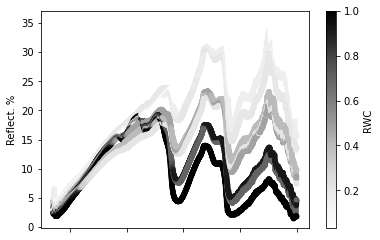

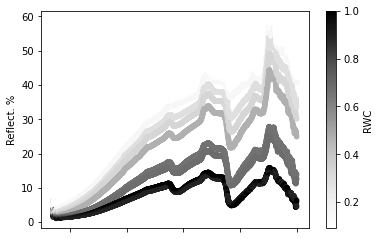

In [14]:
residue_reflectance[residue_reflectance['Crop']=='Canola'].plot.scatter('Wvl','Reflect. %',c='RWC')
soil_reflectance[soil_reflectance['Crop']=='Palouse_no_till'].plot.scatter('Wvl','Reflect. %',c='RWC')

In [15]:
nir_min=800
nir_max=2500
vis_min=400
vis_max=800

In [16]:
resid_nir = (residue_reflectance['Crop']=='Canola') & (residue_reflectance['Wvl']>nir_min) & (residue_reflectance['Wvl']<=nir_max)
resid_vis = (residue_reflectance['Crop']=='Canola') &  (residue_reflectance['Wvl']>vis_min) & (residue_reflectance['Wvl']<=vis_max)
resid_nir_r=residue_reflectance[resid_nir].groupby('RWC').mean('Reflect. %')
resid_vis_r=residue_reflectance[resid_vis].groupby('RWC').mean('Reflect. %')

In [17]:
soil_nir = (soil_reflectance['Crop']=='Palouse_no_till') & (soil_reflectance['Wvl']>nir_min) & (soil_reflectance['Wvl']<=nir_max)
soil_vis = (soil_reflectance['Crop']=='Palouse_no_till') & (soil_reflectance['Wvl']>vis_min) & (soil_reflectance['Wvl']<=vis_max)
soil_nir_r=residue_reflectance[soil_nir].groupby('RWC').mean('Reflect. %')
soil_vis_r=residue_reflectance[soil_vis].groupby('RWC').mean('Reflect. %')

C:\Users\joaquin\AppData\Local\Temp/ipykernel_15464/772006154.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  soil_nir_r=residue_reflectance[soil_nir].groupby('RWC').mean('Reflect. %')
C:\Users\joaquin\AppData\Local\Temp/ipykernel_15464/772006154.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  soil_vis_r=residue_reflectance[soil_vis].groupby('RWC').mean('Reflect. %')


<AxesSubplot:xlabel='RWC'>

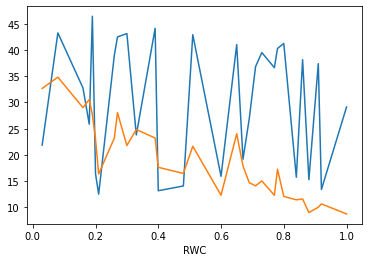

In [18]:
soil_vis_r['Reflect. %'].plot()
soil_nir_r['Reflect. %'].plot()

<AxesSubplot:xlabel='RWC'>

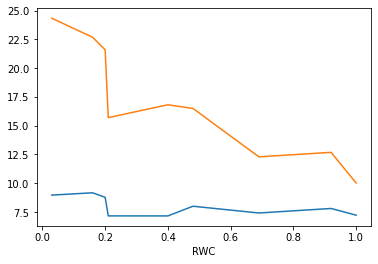

In [19]:
resid_vis_r['Reflect. %'].plot()
resid_nir_r['Reflect. %'].plot()

In [20]:
np.array(resid_vis_r)

array([[600.5     ,   8.9566  ],
       [600.5     ,   9.15655 ],
       [600.5     ,   8.763725],
       [600.5     ,   7.14895 ],
       [600.5     ,   7.1469  ],
       [600.5     ,   7.987575],
       [600.5     ,   7.40075 ],
       [600.5     ,   7.7943  ],
       [600.5     ,   7.210775]])

In [21]:
resid_vis_r['RWC']=resid_vis_r.index

In [22]:
resid_nir_r['RWC']=resid_nir_r.index
soil_vis_r['RWC']=soil_vis_r.index
soil_nir_r['RWC']=soil_nir_r.index

In [23]:
x=soil_nir_r.values[:,2].reshape(-1, 1)
y=soil_nir_r.values[:,1].reshape(-1, 1)/100

lm_soil_nir = LinearRegression()  # create object for the class
lm_soil_nir.fit(x, y)  # perform linear regression

print(lm_soil_nir.intercept_[0])
print(lm_soil_nir.coef_[0][0])

x=soil_vis_r.values[:,2].reshape(-1, 1)
y=soil_vis_r.values[:,1].reshape(-1, 1)/100

lm_soil_vis = LinearRegression()  # create object for the class
lm_soil_vis.fit(x, y)  # perform linear regression

print(lm_soil_vis.intercept_[0])
print(lm_soil_vis.coef_[0][0])

0.3111017523950508
-0.22854423005489202
0.31546955488562417
-0.02404687778712736


In [24]:
x=resid_nir_r.values[:,2].reshape(-1, 1)
y=resid_nir_r.values[:,1].reshape(-1, 1)/100

lm_residue_nir = LinearRegression()  # create object for the class
lm_residue_nir.fit(x, y)  # perform linear regression

print(lm_residue_nir.intercept_[0])
print(lm_residue_nir.coef_[0][0])

x=resid_vis_r.values[:,2].reshape(-1, 1)
y=resid_vis_r.values[:,1].reshape(-1, 1)/100

lm_residue_vis = LinearRegression()  # create object for the class
lm_residue_vis.fit(x, y)  # perform linear regression

print(lm_residue_vis.intercept_[0])
print(lm_residue_vis.coef_[0][0])

0.22869509446895972
-0.13030190498706795
0.08589644446587742
-0.01403588024276204
